<a href="https://colab.research.google.com/github/PRsant90/Challenge_datos_2/blob/main/Challenge_Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGA DATOS

In [630]:
import pandas as pd
import matplotlib.pyplot as plt


In [631]:
datos_clientes = pd.read_json('/content/drive/MyDrive/challenge 2/TelecomX_Data.json')
datos_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


TRANSFORMACIÓN

In [632]:
customer_df = pd.json_normalize(datos_clientes['customer'])
customer_df.columns = [f'customer_{col}' for col in customer_df.columns]

In [633]:
phone_df = pd.json_normalize(datos_clientes['phone'])
phone_df.columns = [f'phone_{col}' for col in phone_df.columns]

In [634]:
internet_df = pd.json_normalize(datos_clientes['internet'])
internet_df.columns = [f'internet_{col}' for col in internet_df.columns]

In [635]:
account_simple_df = pd.json_normalize(
    datos_clientes['account'].apply(lambda x: {k: v for k, v in x.items() if k != 'Charges'})
)
account_simple_df.columns = [f'account_{col}' for col in account_simple_df.columns]


In [636]:
charges_df = pd.json_normalize(datos_clientes['account'].apply(lambda x: x['Charges']))
charges_df.columns = [f'account_Charges_{col}' for col in charges_df.columns]

In [637]:
df_final = pd.concat([datos_clientes[['customerID','Churn']],
                      customer_df,
                      phone_df,
                      internet_df,
                      account_simple_df,
                      charges_df], axis=1)

In [638]:
print(df_final.head())
print(df_final.columns)

   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

In [639]:
df_final.head(100)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0151-ONTOV,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,70.90,70.9
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
97,0156-FVPTA,Yes,Male,0,Yes,No,22,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.20,1152.7
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85


In [640]:
df_final.info

<bound method DataFrame.info of       customerID Churn customer_gender  customer_SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
0                     No                      DSL  ...                   Yes   
1                    Yes                      DSL  ...                    No   
2                     No              Fiber optic  ...                    No   
3                     No              Fiber optic  ...                   Yes   
4                     No              Fiber optic  ...                    No   
...                  ...                      ...  ...                   ...   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Ye

In [641]:
df_final.shape

(7267, 21)

In [642]:
df_final.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [643]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [644]:
for col in df_final.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_final[col].unique()[:5]}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ']
Churn: ['No' 'Yes' '']
customer_gender: ['Female' 'Male']
customer_Partner: ['Yes' 'No']
customer_Dependents: ['Yes' 'No']
phone_PhoneService: ['Yes' 'No']
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes' 'No' 'No internet service']
internet_StreamingMovies: ['No' 'Yes' 'No internet service']
account_Contract: ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling: ['Yes' 'No']
account_PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account_Charges_Total: ['593.3' '542.4' '280.85' '1237.85' '267.4']


In [645]:
df_final['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


El 26 % se fue, hay que averiguar porque

In [646]:
df_final.isnull().sum().sort_values(ascending=False)

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [647]:
df_final.duplicated().sum()

np.int64(0)

In [648]:
print(df_final[['account_Charges_Monthly', 'account_Charges_Total']].head())

   account_Charges_Monthly account_Charges_Total
0                     65.6                 593.3
1                     59.9                 542.4
2                     73.9                280.85
3                     98.0               1237.85
4                     83.9                 267.4


In [649]:
for col in df_final.select_dtypes(include='object'):
    df_final[col] = df_final[col].str.strip().str.lower()

In [650]:
for col in df_final.select_dtypes(include='object'):
    print(f'{col}: {df_final[col].unique()}')

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn: ['no' 'yes' '']
customer_gender: ['female' 'male']
customer_Partner: ['yes' 'no']
customer_Dependents: ['yes' 'no']
phone_PhoneService: ['yes' 'no']
phone_MultipleLines: ['no' 'yes' 'no phone service']
internet_InternetService: ['dsl' 'fiber optic' 'no']
internet_OnlineSecurity: ['no' 'yes' 'no internet service']
internet_OnlineBackup: ['yes' 'no' 'no internet service']
internet_DeviceProtection: ['no' 'yes' 'no internet service']
internet_TechSupport: ['yes' 'no' 'no internet service']
internet_StreamingTV: ['yes' 'no' 'no internet service']
internet_StreamingMovies: ['no' 'yes' 'no internet service']
account_Contract: ['one year' 'month-to-month' 'two year']
account_PaperlessBilling: ['yes' 'no']
account_PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
account_Charges_Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '37

In [651]:
cols_internet = [col for col in df_final.columns if 'internet_' in col and col != 'internet_InternetService']

for col in cols_internet:
    df_final[col] = df_final[col].replace('no internet service', 'no')

In [652]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [653]:
df_final['account_Charges_Monthly'] = pd.to_numeric(df_final['account_Charges_Monthly'], errors='coerce')
df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce')
df_final['customer_SeniorCitizen'] = df_final['customer_SeniorCitizen'].astype(int)
df_final['customer_tenure'] = df_final['customer_tenure'].astype(int)


In [654]:
df_final.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [655]:
binarias = []
for col in df_final.columns:
    valores = df_final[col].dropna().unique()
    if set(valores).issubset({'yes', 'no'}):
        binarias.append(col)

df_final[binarias] = df_final[binarias].replace({'yes': 1, 'no': 0})
df_final[binarias] = df_final[binarias].astype(int)

/tmp/ipython-input-655-3778097003.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[binarias] = df_final[binarias].replace({'yes': 1, 'no': 0})


In [656]:
print(df_final.head())
print(df_final.dtypes)


   customerID Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0  0002-orfbo    no          female                       0                 1   
1  0003-mknfe    no            male                       0                 0   
2  0004-tlhlj   yes            male                       0                 0   
3  0011-igkff   yes            male                       1                 1   
4  0013-exchz   yes          female                       1                 1   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone_MultipleLines internet_InternetService  ...  internet_OnlineBackup  \
0                  no                      dsl  ...     

In [657]:
df_final = df_final.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'evasión',
    'customer_gender': 'sexo',
    'customer_SeniorCitizen': 'adulto_mayor',
    'customer_Partner': 'tiene_pareja',
    'customer_Dependents': 'tiene_dependientes',
    'customer_tenure': 'antiguedad_meses',
    'phone_PhoneService': 'servicio_telefono',
    'phone_MultipleLines': 'lineas_multiples',
    'internet_InternetService': 'tipo_internet',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_OnlineBackup': 'respaldo_online',
    'internet_DeviceProtection': 'proteccion_dispositivos',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'usa_streaming_tv',
    'internet_StreamingMovies': 'usa_streaming_pelis',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'factura_online',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Monthly': 'cargos_mensuales',
    'account_Charges_Total': 'cargos_totales'
})


In [658]:
df_final['sexo'] = df_final['sexo'].map({'male': 1, 'female': 0})


In [659]:
df_final.isnull().sum()

,0
id_cliente,0
evasión,0
sexo,0
adulto_mayor,0
tiene_pareja,0
tiene_dependientes,0
antiguedad_meses,0
servicio_telefono,0
lineas_multiples,0
tipo_internet,0


In [660]:
df_final = df_final.rename(columns={'sexo_male': 'sexo'})

In [661]:
df_final['cargos_totales'] = pd.to_numeric(df_final['cargos_totales'], errors='coerce')
df_final = df_final.dropna(subset=['cargos_totales'])

In [662]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7256 non-null   object 
 1   evasión                  7256 non-null   object 
 2   sexo                     7256 non-null   int64  
 3   adulto_mayor             7256 non-null   int64  
 4   tiene_pareja             7256 non-null   int64  
 5   tiene_dependientes       7256 non-null   int64  
 6   antiguedad_meses         7256 non-null   int64  
 7   servicio_telefono        7256 non-null   int64  
 8   lineas_multiples         7256 non-null   object 
 9   tipo_internet            7256 non-null   object 
 10  seguridad_en_linea       7256 non-null   int64  
 11  respaldo_online          7256 non-null   int64  
 12  proteccion_dispositivos  7256 non-null   int64  
 13  soporte_tecnico          7256 non-null   int64  
 14  usa_streaming_tv         7256

In [663]:
df_final['cuentas_diarias'] = df_final['cargos_mensuales']/30
print(df_final[['cargos_mensuales','cuentas_diarias']].head())

   cargos_mensuales  cuentas_diarias
0              65.6         2.186667
1              59.9         1.996667
2              73.9         2.463333
3              98.0         3.266667
4              83.9         2.796667


In [664]:
print(df_final['evasión'].unique())

['no' 'yes' '']


In [665]:
df_final[df_final['evasión'] =='']

,id_cliente,evasión,sexo,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,tipo_internet,...,proteccion_dispositivos,soporte_tecnico,usa_streaming_tv,usa_streaming_pelis,tipo_contrato,factura_online,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
30,0047-zhdtw,,0,0,0,0,11,1,yes,fiber optic,...,0,0,0,0,month-to-month,1,bank transfer (automatic),79.00,929.30,2.633333
75,0120-yzlqa,,1,0,0,0,71,1,no,no,...,0,0,0,0,two year,1,credit card (automatic),19.90,1355.10,0.663333
96,0154-qyhju,,1,0,0,0,29,1,no,dsl,...,0,1,0,0,one year,1,electronic check,58.75,1696.20,1.958333
98,0162-rzgmz,,0,1,0,0,5,1,no,dsl,...,0,1,0,0,month-to-month,0,credit card (automatic),59.90,287.85,1.996667
175,0274-vvqoq,,1,1,1,0,65,1,yes,fiber optic,...,1,0,1,1,one year,1,bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-gsrfx,,0,0,0,0,14,1,yes,dsl,...,0,0,0,0,one year,1,mailed check,54.25,773.20,1.808333
7180,9872-rzqqb,,0,0,1,0,49,0,no phone service,dsl,...,0,0,1,0,month-to-month,0,bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-gndmb,,1,0,0,0,9,1,yes,fiber optic,...,0,0,0,0,month-to-month,1,electronic check,76.25,684.85,2.541667
7239,9955-rvwsc,,0,0,1,1,67,1,no,no,...,0,0,0,0,two year,1,bank transfer (automatic),19.25,1372.90,0.641667


In [666]:
df_final = df_final[df_final['evasión'] !='']

In [667]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7032 non-null   object 
 1   evasión                  7032 non-null   object 
 2   sexo                     7032 non-null   int64  
 3   adulto_mayor             7032 non-null   int64  
 4   tiene_pareja             7032 non-null   int64  
 5   tiene_dependientes       7032 non-null   int64  
 6   antiguedad_meses         7032 non-null   int64  
 7   servicio_telefono        7032 non-null   int64  
 8   lineas_multiples         7032 non-null   object 
 9   tipo_internet            7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   int64  
 11  respaldo_online          7032 non-null   int64  
 12  proteccion_dispositivos  7032 non-null   int64  
 13  soporte_tecnico          7032 non-null   int64  
 14  usa_streaming_tv         7032

##ANALISIS DESCRIPTIVO##



In [668]:
df_final.describe()

,sexo,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,seguridad_en_linea,respaldo_online,proteccion_dispositivos,soporte_tecnico,usa_streaming_tv,usa_streaming_pelis,factura_online,cargos_mensuales,cargos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [669]:
df_final['evasión'] = df_final['evasión'].replace({'yes': 1, 'no': 0})  # ← Esto no cambia dtype automáticamente


/tmp/ipython-input-669-2000717567.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['evasión'] = df_final['evasión'].replace({'yes': 1, 'no': 0})  # ← Esto no cambia dtype automáticamente


In [670]:
df_final['evasión'] = pd.to_numeric(df_final['evasión'], errors='coerce').astype(int)


In [671]:
print(df_final['evasión'].dtype)

int64


In [672]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7032 non-null   object 
 1   evasión                  7032 non-null   int64  
 2   sexo                     7032 non-null   int64  
 3   adulto_mayor             7032 non-null   int64  
 4   tiene_pareja             7032 non-null   int64  
 5   tiene_dependientes       7032 non-null   int64  
 6   antiguedad_meses         7032 non-null   int64  
 7   servicio_telefono        7032 non-null   int64  
 8   lineas_multiples         7032 non-null   object 
 9   tipo_internet            7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   int64  
 11  respaldo_online          7032 non-null   int64  
 12  proteccion_dispositivos  7032 non-null   int64  
 13  soporte_tecnico          7032 non-null   int64  
 14  usa_streaming_tv         7032

In [673]:
df_final.head()

,id_cliente,evasión,sexo,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,tipo_internet,...,proteccion_dispositivos,soporte_tecnico,usa_streaming_tv,usa_streaming_pelis,tipo_contrato,factura_online,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-orfbo,0,0,0,1,1,9,1,no,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,1,0,0,0,9,1,yes,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,1,0,0,0,4,1,no,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,1,1,1,0,13,1,no,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,0,1,1,0,3,1,no,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [674]:
columnas_interes = ['antiguedad_meses', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']

for col in columnas_interes:
    print(f'\n📊 {col.upper()}')
    print(f"Media: {df_final[col].mean():.2f}")
    print(f"Mediana: {df_final[col].median():.2f}")
    print(f"Desviación estándar: {df_final[col].std():.2f}")
    print(f"Mínimo: {df_final[col].min():.2f}")
    print(f"Máximo: {df_final[col].max():.2f}")



📊 ANTIGUEDAD_MESES
Media: 32.42
Mediana: 29.00
Desviación estándar: 24.55
Mínimo: 1.00
Máximo: 72.00

📊 CARGOS_MENSUALES
Media: 64.80
Mediana: 70.35
Desviación estándar: 30.09
Mínimo: 18.25
Máximo: 118.75

📊 CARGOS_TOTALES
Media: 2283.30
Mediana: 1397.47
Desviación estándar: 2266.77
Mínimo: 18.80
Máximo: 8684.80

📊 CUENTAS_DIARIAS
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Mínimo: 0.61
Máximo: 3.96


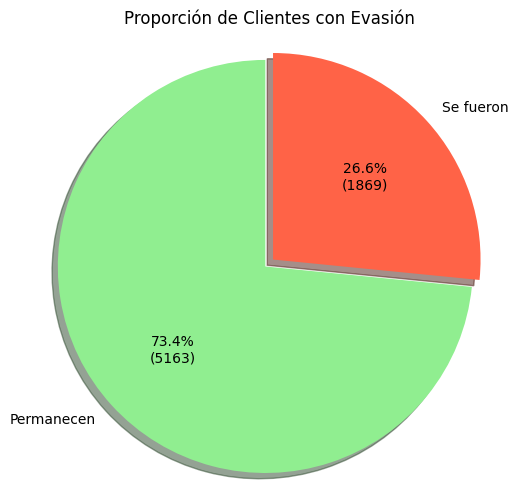

In [675]:
import matplotlib.pyplot as plt

# Conteo de clientes por evasión
conteo = df_final['evasión'].value_counts().sort_index()
labels = ['Permanecen', 'Se fueron']
colors = ['lightgreen', 'tomato']

# Función para mostrar % y cantidad
def autopct_func(pct):
    total = conteo.sum()
    valor = int(round(pct/100. * total))
    return f'{pct:.1f}%\n({valor})'

# Gráfico
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=labels, autopct=autopct_func, colors=colors,
        explode=(0, 0.05), shadow=True, startangle=90)
plt.title('Proporción de Clientes con Evasión')
plt.axis('equal')  # Para que sea circular
plt.show()



/tmp/ipython-input-689-2368623837.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['female', 'male'])
/tmp/ipython-input-689-2368623837.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['no', 'sí'])


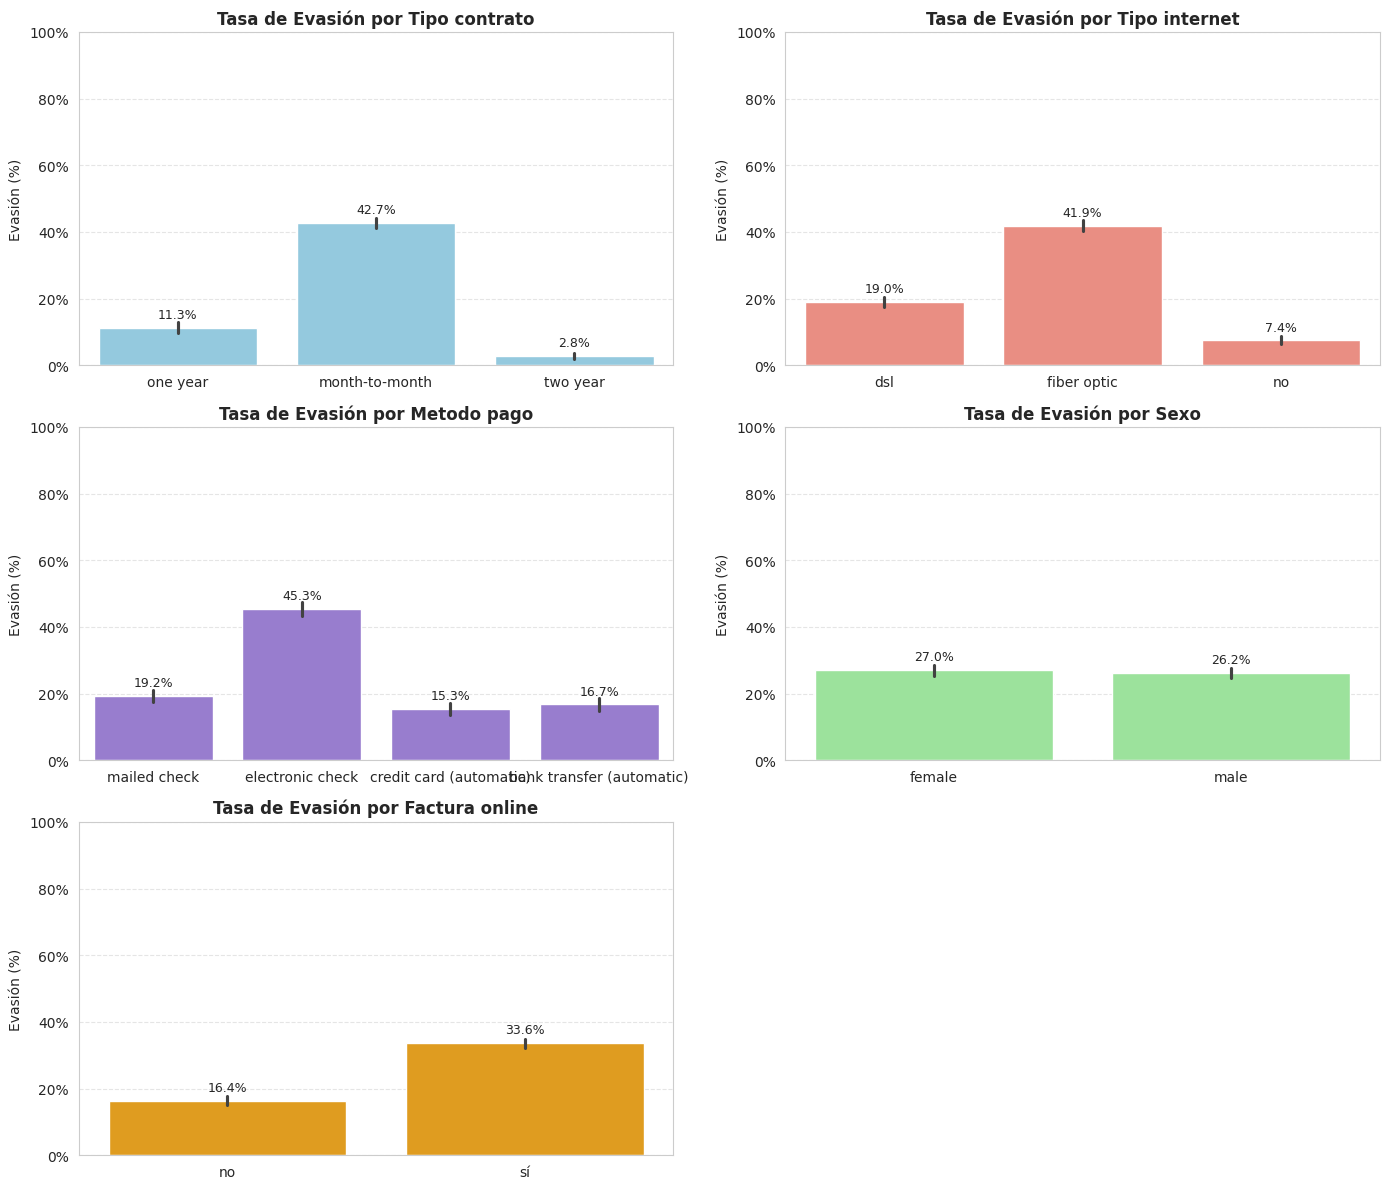

In [689]:

from matplotlib.ticker import PercentFormatter

categorias = ['tipo_contrato', 'tipo_internet', 'metodo_pago', 'sexo', 'factura_online']
n = len(categorias)
colores = ['skyblue', 'salmon', 'mediumpurple', 'lightgreen', 'orange']

fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(categorias):
    ax = axes[i]
    sns.barplot(data=df_final, x=col, y='evasión', estimator='mean',
                ax=ax, color=colores[i % len(colores)])

    ax.set_title(f'Tasa de Evasión por {col.replace("_", " ").capitalize()}', fontsize=12, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Evasión (%)')
    ax.set_ylim(0, 1)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(axis='y', linestyle='--', alpha=0.5)


    if col == 'sexo':
        ax.set_xticklabels(['female', 'male'])
    elif col == 'factura_online':
        ax.set_xticklabels(['no', 'sí'])

    # Etiquetas arriba de las barras
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height*100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


